In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

import warnings
# warnings.filterwarnings("ignore")

# The Problem

Find what are the major factors that lead to the best job opportunities for graduates from this institution.

## Questions

- What are the major factors that lead to the person being hired
    - Metrics: Accurately predict if a person will be hired or not
- What impacts the most on the salary
    - Metrics: Expected salary
- Can the institution predict if the person will get good results in the MBA before they are accepted?
    - Metrics: The scores in the course and likelihood of the person being hired
    
    
  
## Why?

### Benefits for the person:
    
The person will be able to know beforehand on what to focus to get the best results (placement/salary).

## Benefits for the institution:

The instituion may be able to better select its students, reducing failures and placing its students in the best market positions. It might lead to a higher renown for the institution.

Also, the instituion may use the information to better prepare the course, focusing on the most important things to the market.

In [2]:
col_names = [
    "SerialNumber", 
    "Gender", 
    "LowerSecondarySchollGrade%", 
    "LowerSecondarySchollBoard", 
    "HigherSecondarySchollGrade%", 
    "HigherSecondarySchollBoard",
    "HigherSecondarySchollSpecialization",
    "DegreeGrade%",
    "DegreeSpecialization",
    "WorkExperience",
    "EmployabilityTestGrade%",
    "MBASpecialization",
    "MBAGrade%",
    "PlacementStatus",
    "Salary"
]
data = pd.read_csv("data/Placement_Data_Full_Class.csv", names=col_names, header=0)
data.head(10)

,SerialNumber,Gender,LowerSecondarySchollGrade%,LowerSecondarySchollBoard,HigherSecondarySchollGrade%,HigherSecondarySchollBoard,HigherSecondarySchollSpecialization,DegreeGrade%,DegreeSpecialization,WorkExperience,EmployabilityTestGrade%,MBASpecialization,MBAGrade%,PlacementStatus,Salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


First thing to notice here is that if the status is "Not Placed", it seems that the salary will be NaN. Just a remainder to not treat it as missing data.
It will be necessary to check if there is someone "Placed" with a NaN salary.

Some encoding will be necessary for the categorical data.

The first column seems to be just an ID. It ill be droped.

Let's take a better look at the features information

In [3]:
data.describe()

,SerialNumber,LowerSecondarySchollGrade%,HigherSecondarySchollGrade%,DegreeGrade%,EmployabilityTestGrade%,MBAGrade%,Salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
data.isnull().sum()

SerialNumber                            0
Gender                                  0
LowerSecondarySchollGrade%              0
LowerSecondarySchollBoard               0
HigherSecondarySchollGrade%             0
HigherSecondarySchollBoard              0
HigherSecondarySchollSpecialization     0
DegreeGrade%                            0
DegreeSpecialization                    0
WorkExperience                          0
EmployabilityTestGrade%                 0
MBASpecialization                       0
MBAGrade%                               0
PlacementStatus                         0
Salary                                 67
dtype: int64

Great, it seems that there is no missing values (except the ones in the salary, but we already know they are not really missing). 

Also, there is no sign of weird outliers in the quantitative features.

In [5]:
data.drop("SerialNumber", axis=1, inplace=True)

Let's analyse the distribution of the PlacementStatus column

Placed 68.84 % of the dataset
Not placed 31.16 % of the dataset


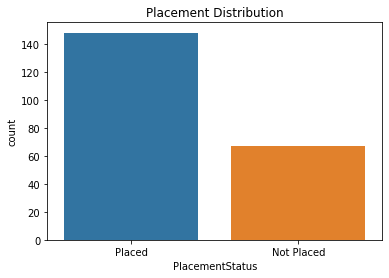

In [6]:
sns.countplot("PlacementStatus", data=data)
plt.title("Placement Distribution")

print('Placed', round(data["PlacementStatus"].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Not placed', round(data["PlacementStatus"].value_counts()[1]/len(data) * 100,2), '% of the dataset')

The placement is unbalanced.


In [7]:
data[data["PlacementStatus"] == "Not Placed"]["PlacementStatus"].value_counts()

Not Placed    67
Name: PlacementStatus, dtype: int64

All missing salaries are associated to Not Placed people

## Gender

Men 64.65 % of the dataset
Women 35.35 % of the dataset


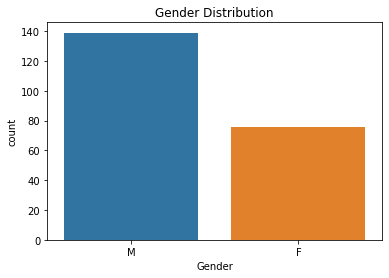

In [8]:
sns.countplot("Gender", data=data)
plt.title("Gender Distribution")

print('Men', round(data["Gender"].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Women', round(data["Gender"].value_counts()[1]/len(data) * 100,2), '% of the dataset')

## Relation between EmployabilityTest and PlacementStatus

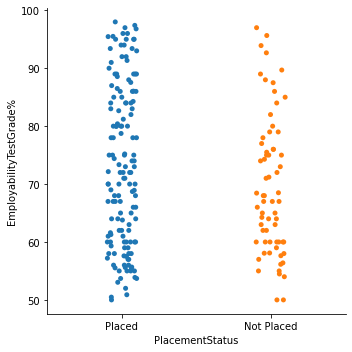

In [9]:
sns.catplot("PlacementStatus", "EmployabilityTestGrade%", data=data)

Surprisingly, the employability test seems to not be a major factor to the placement rate. There are a lot of students with good scores that did not land a job. It may be necessary for the institution to rethink this test.

## Salary

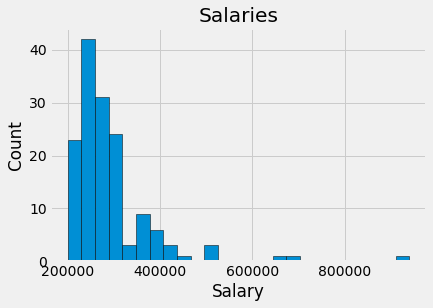

In [10]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data['Salary'], edgecolor = 'k', bins = 25)
plt.title('Salaries'); plt.xlabel('Salary'); plt.ylabel('Count');

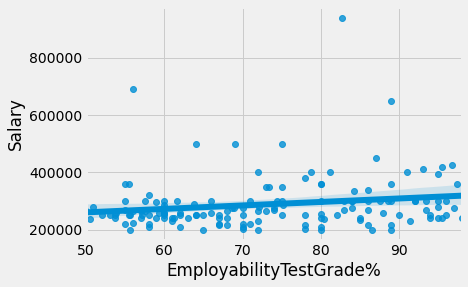

In [11]:
sns.regplot("EmployabilityTestGrade%", "Salary", data=data)

There is a positive relation between salary and the employability test. It is not huge, but it is visible. 

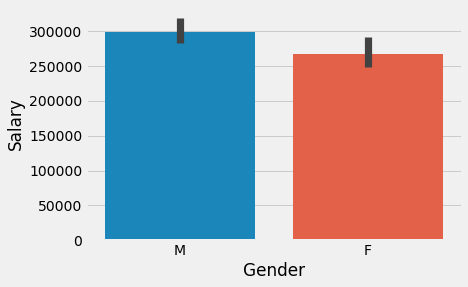

In [12]:
sns.barplot("Gender", "Salary", data=data)

Men seems to have higher salary than women. It may be because of different backgrounds / fields. I will take a look at this.

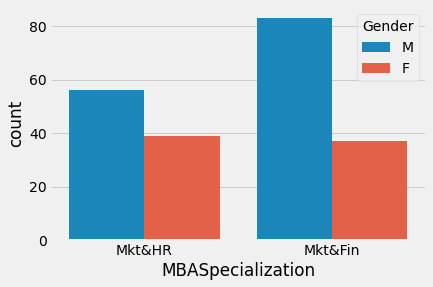

In [13]:
# MBASpecialization
sns.countplot("MBASpecialization", hue="Gender", data=data)

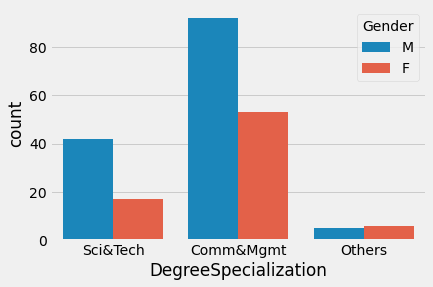

In [14]:
sns.countplot("DegreeSpecialization", hue="Gender", data=data)

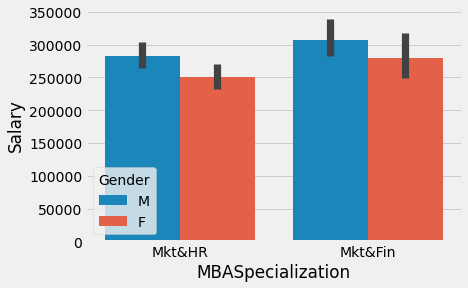

In [15]:
sns.barplot("MBASpecialization", "Salary", "Gender", data=data)

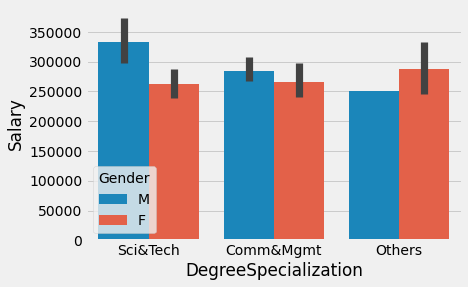

In [16]:
sns.barplot("DegreeSpecialization", "Salary", "Gender", data=data)

Women that came from men-dominated fields receive lower salaries, but receive higher salaries if they came from "Others" fields. However, the amount of data from the "Others" field is not large enough to give a conclusive answer, more data would be required.

## Is the MBAGrade important?

[(0.0, 100.0)]

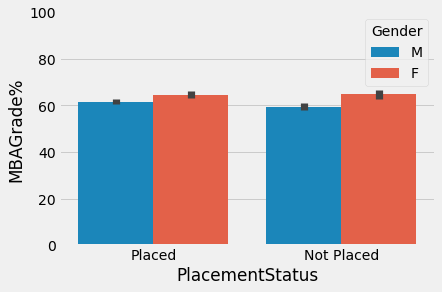

In [17]:
plot = sns.barplot("PlacementStatus", "MBAGrade%", "Gender", data=data)
plot.set(ylim = (0, 100))

Even with higher grades, women are less likely to be hired.

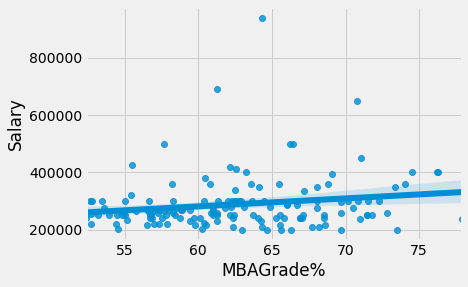

In [18]:
sns.regplot("MBAGrade%", "Salary", data=data)

But the grade indeed is important to the salary

## Deeper look at the student past

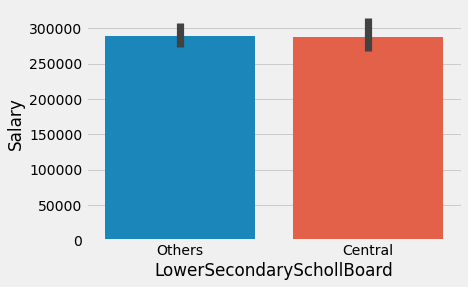

In [19]:
sns.barplot("LowerSecondarySchollBoard", "Salary", data=data)

The Lower scholl board that the student came from seems to have no impact here, but the outliers came from the central board, which is interesting.

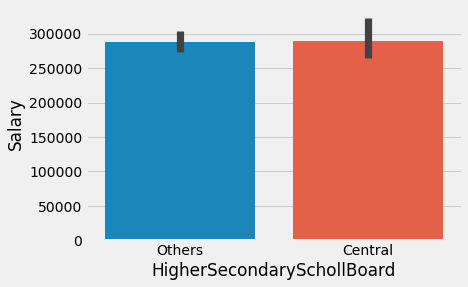

In [20]:
sns.barplot("HigherSecondarySchollBoard", "Salary", data=data)

Same thing here. No major impact.

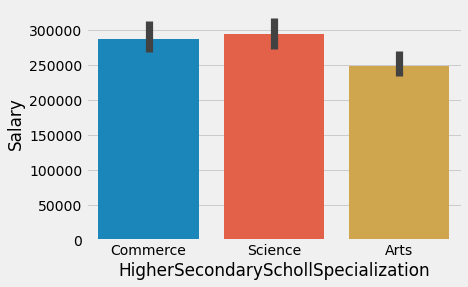

In [21]:
sns.barplot("HigherSecondarySchollSpecialization", "Salary", data=data)

This one is more interesting. Science as a Higher secondary scholl specialization leads to a better salary than the other options (specially Arts)

Let's take a look at the Degree and MBA specializations again, now without the gender

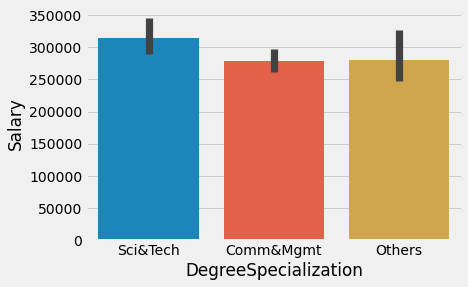

In [22]:
sns.barplot("DegreeSpecialization", "Salary", data=data)

Science is in the lead again.

## What about the MBA field of choice?

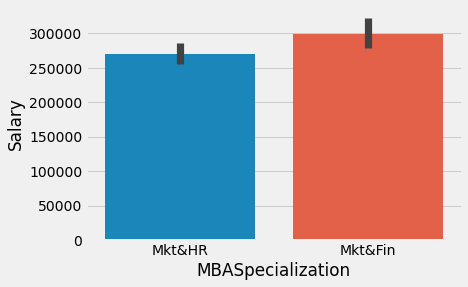

In [23]:
sns.barplot("MBASpecialization", "Salary", data=data)

This one seems to have a huge impact. An MBA in finances leads to a higher salary than in HR.

[(0.0, 100.0)]

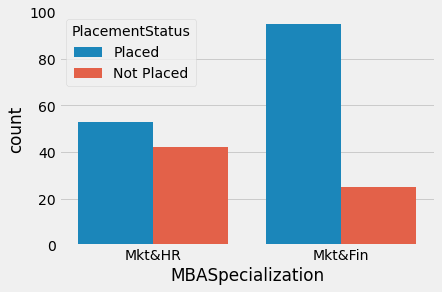

In [24]:
plot = sns.countplot("MBASpecialization", hue="PlacementStatus", data=data)
plot.set(ylim = (0, 100))

An MBA in Finances leads to a way better employability too. Students in doubt should really think about the Mkt&Fin MBA to  garantee the best oportunities later on

## How about work experience?

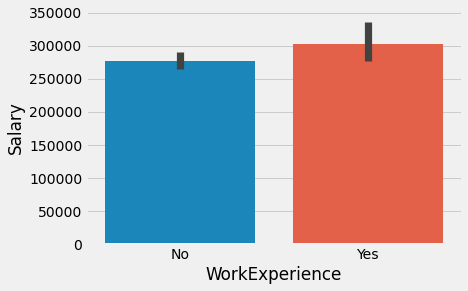

In [25]:
sns.barplot("WorkExperience", "Salary", data=data)

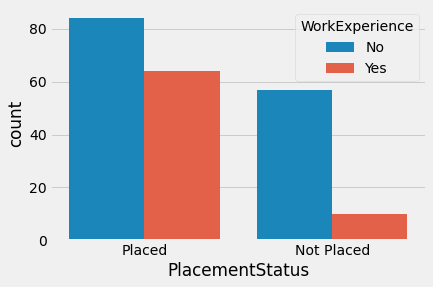

In [26]:
sns.countplot("PlacementStatus", hue="WorkExperience", data=data)

Work Experience is really important! Having working previously leads to a way higher employment rate and salary.

## Does the grade in scholl afect your future life?

This one is trickier. Even if the plots show this is true, it might be that people with higher grades in scholl tends to have higher grades in the university or MBA. The true answer will only come with a correlation analysis, but I will plot some graphs to see if I can extract anything from them.

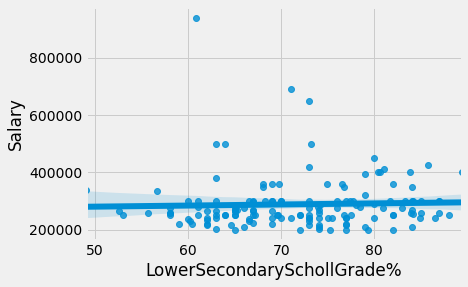

In [27]:
sns.regplot("LowerSecondarySchollGrade%", "Salary", data=data)

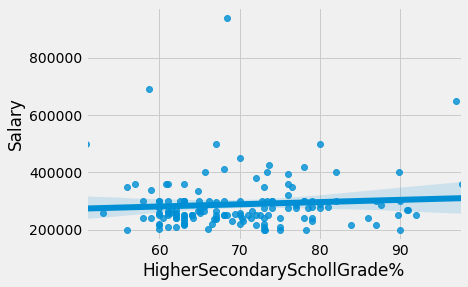

In [28]:
sns.regplot("HigherSecondarySchollGrade%", "Salary", data=data)

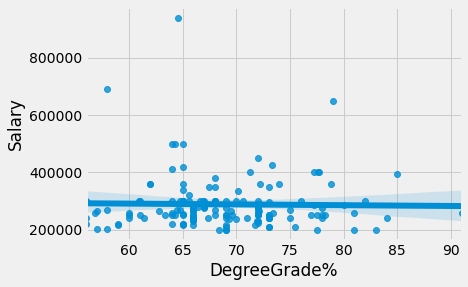

In [29]:
sns.regplot("DegreeGrade%", "Salary", data=data)

There seems to be no relation between grades in previous education and salaries.

Now for placement:

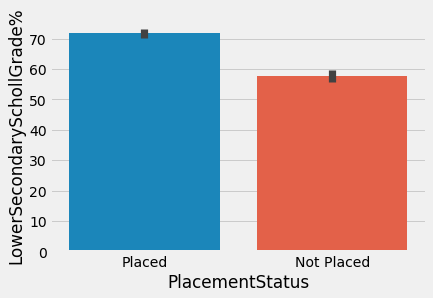

In [30]:
sns.barplot("PlacementStatus", "LowerSecondarySchollGrade%", data=data)

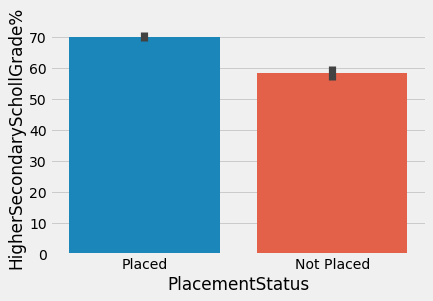

In [31]:
sns.barplot("PlacementStatus", "HigherSecondarySchollGrade%", data=data)

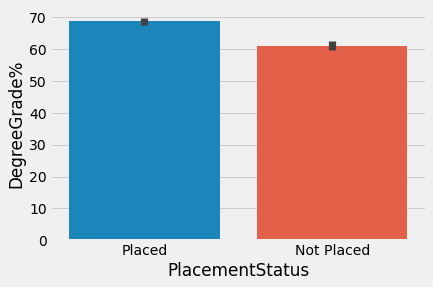

In [32]:
sns.barplot("PlacementStatus", "DegreeGrade%", data=data)

This is interesting. Although it does not effect the salary, the previous grades immensely affect the chance to get a job. We will need to take a look at this

## Taking care of categorical features

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               215 non-null    object 
 1   LowerSecondarySchollGrade%           215 non-null    float64
 2   LowerSecondarySchollBoard            215 non-null    object 
 3   HigherSecondarySchollGrade%          215 non-null    float64
 4   HigherSecondarySchollBoard           215 non-null    object 
 5   HigherSecondarySchollSpecialization  215 non-null    object 
 6   DegreeGrade%                         215 non-null    float64
 7   DegreeSpecialization                 215 non-null    object 
 8   WorkExperience                       215 non-null    object 
 9   EmployabilityTestGrade%              215 non-null    float64
 10  MBASpecialization                    215 non-null    object 
 11  MBAGrade%                       

In [34]:
data["Gender"].value_counts()

M    139
F     76
Name: Gender, dtype: int64

In [35]:
data["LowerSecondarySchollBoard"].value_counts()

Central    116
Others      99
Name: LowerSecondarySchollBoard, dtype: int64

In [36]:
data["HigherSecondarySchollBoard"].value_counts()

Others     131
Central     84
Name: HigherSecondarySchollBoard, dtype: int64

In [37]:
data["HigherSecondarySchollSpecialization"].value_counts()

Commerce    113
Science      91
Arts         11
Name: HigherSecondarySchollSpecialization, dtype: int64

In [38]:
data["DegreeSpecialization"].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: DegreeSpecialization, dtype: int64

In [39]:
data["WorkExperience"].value_counts()

No     141
Yes     74
Name: WorkExperience, dtype: int64

In [40]:
data["MBASpecialization"].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: MBASpecialization, dtype: int64

In [41]:
data["PlacementStatus"].value_counts()

Placed        148
Not Placed     67
Name: PlacementStatus, dtype: int64

## Encoding

We will Label Encode (no new columns) categorical features that only have two unique values. e.g. Gender M/F and Hot Encoded every other categorical column (columns with more than 2 unique values)

In [42]:
def label_encoding(data):
    le = LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [43]:
def one_hot_encoding(data):
    return pd.get_dummies(data)

In [44]:
data["Gender"] = label_encoding(data["Gender"])
data["LowerSecondarySchollBoard"] = label_encoding(data["LowerSecondarySchollBoard"])
data["HigherSecondarySchollBoard"] = label_encoding(data["HigherSecondarySchollBoard"])
data["WorkExperience"] = label_encoding(data["WorkExperience"])
data["MBASpecialization"] = label_encoding(data["MBASpecialization"])
data["PlacementStatus"] = label_encoding(data["PlacementStatus"])

In [45]:
data = one_hot_encoding(data)

In [46]:
data.head(10)

,Gender,LowerSecondarySchollGrade%,LowerSecondarySchollBoard,HigherSecondarySchollGrade%,HigherSecondarySchollBoard,DegreeGrade%,WorkExperience,EmployabilityTestGrade%,MBASpecialization,MBAGrade%,PlacementStatus,Salary,HigherSecondarySchollSpecialization_Arts,HigherSecondarySchollSpecialization_Commerce,HigherSecondarySchollSpecialization_Science,DegreeSpecialization_Comm&Mgmt,DegreeSpecialization_Others,DegreeSpecialization_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.00,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.50,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.00,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.00,1,59.43,0,NaN,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.80,0,55.50,1,425000.0,0,1,0,1,0,0
5,1,55.00,1,49.80,1,67.25,1,55.00,0,51.58,0,NaN,0,0,1,0,0,1
6,0,46.00,1,49.20,1,79.00,0,74.28,0,53.29,0,NaN,0,1,0,1,0,0
7,1,82.00,0,64.00,0,66.00,1,67.00,0,62.14,1,252000.0,0,0,1,0,0,1
8,1,73.00,0,79.00,0,72.00,0,91.34,0,61.29,1,231000.0,0,1,0,1,0,0
9,1,58.00,0,70.00,0,61.00,0,54.00,0,52.21,0,NaN,0,1,0,1,0,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        215 non-null    int64  
 1   LowerSecondarySchollGrade%                    215 non-null    float64
 2   LowerSecondarySchollBoard                     215 non-null    int64  
 3   HigherSecondarySchollGrade%                   215 non-null    float64
 4   HigherSecondarySchollBoard                    215 non-null    int64  
 5   DegreeGrade%                                  215 non-null    float64
 6   WorkExperience                                215 non-null    int64  
 7   EmployabilityTestGrade%                       215 non-null    float64
 8   MBASpecialization                             215 non-null    int64  
 9   MBAGrade%                                     215 non-null    flo

## Correlations

In [48]:
salary_corr = data[data["PlacementStatus"] == 1].corr()["Salary"].sort_values()

# Display correlations
salary_corr # corr() returns NaN if all values are that same, which is the case with PlacementStatus

DegreeSpecialization_Comm&Mgmt                 -0.160322
MBASpecialization                              -0.146576
HigherSecondarySchollSpecialization_Arts       -0.088253
DegreeGrade%                                   -0.019272
DegreeSpecialization_Others                    -0.016573
HigherSecondarySchollSpecialization_Commerce   -0.014219
HigherSecondarySchollBoard                     -0.007549
LowerSecondarySchollBoard                       0.005539
LowerSecondarySchollGrade%                      0.035330
HigherSecondarySchollSpecialization_Science     0.049547
HigherSecondarySchollGrade%                     0.076819
WorkExperience                                  0.136920
Gender                                          0.158912
DegreeSpecialization_Sci&Tech                   0.172492
MBAGrade%                                       0.175013
EmployabilityTestGrade%                         0.178307
Salary                                          1.000000
PlacementStatus                

In [49]:
placement_corr = data.corr()["PlacementStatus"].sort_values()

# Display correlations
placement_corr # Here we are looking at PlacementStatus, so Salary is not important and we will ignore the NaN

MBASpecialization                              -0.250655
DegreeSpecialization_Others                    -0.117232
HigherSecondarySchollSpecialization_Arts       -0.071653
HigherSecondarySchollSpecialization_Science     0.007279
DegreeSpecialization_Sci&Tech                   0.008688
HigherSecondarySchollBoard                      0.016945
HigherSecondarySchollSpecialization_Commerce    0.024414
LowerSecondarySchollBoard                       0.037297
DegreeSpecialization_Comm&Mgmt                  0.046849
MBAGrade%                                       0.076922
Gender                                          0.090670
EmployabilityTestGrade%                         0.127639
WorkExperience                                  0.276060
DegreeGrade%                                    0.479861
HigherSecondarySchollGrade%                     0.491228
LowerSecondarySchollGrade%                      0.607889
PlacementStatus                                 1.000000
Salary                         

These results allow us to see what are the features that most relate with what we are trying to predict.

In the case o PlacementStatus, having high grades during your education (specially basic education) has a huge factor on employability, alongside work experience and the MBA field of choice. 

In the case of salary, major factors are the specialization and most recent grades.

## Feature Engineering and Selection

I will start selecting the features that might give out the best results, and do some engineering on the features.

Lets start by the selection: remove the features that does not seem to have a relation with the problem. I have decided to only drop the School Boards, as I want to test the other features before taking a decision.

In [50]:
columns_to_drop = [
    "LowerSecondarySchollBoard", 
    "HigherSecondarySchollBoard",
]
data.drop(columns_to_drop, axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        215 non-null    int64  
 1   LowerSecondarySchollGrade%                    215 non-null    float64
 2   HigherSecondarySchollGrade%                   215 non-null    float64
 3   DegreeGrade%                                  215 non-null    float64
 4   WorkExperience                                215 non-null    int64  
 5   EmployabilityTestGrade%                       215 non-null    float64
 6   MBASpecialization                             215 non-null    int64  
 7   MBAGrade%                                     215 non-null    float64
 8   PlacementStatus                               215 non-null    int64  
 9   Salary                                        148 non-null    flo

Now, lets create some polynomial features

In [51]:
poly_transformer = PolynomialFeatures(degree=2)

features = [
    "LowerSecondarySchollGrade%", 
    "HigherSecondarySchollGrade%",
    "DegreeGrade%",
    "MBAGrade%",
    "EmployabilityTestGrade%"
]

poly = pd.DataFrame(poly_transformer.fit_transform(data[features]), columns=poly_transformer.get_feature_names(features))
poly_data = pd.concat([data, poly], axis=1)
poly_data.drop(["1"], axis=1, inplace=True)
poly_data = poly_data.loc[:,~poly_data.columns.duplicated()]
poly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Gender                                                  215 non-null    int64  
 1   LowerSecondarySchollGrade%                              215 non-null    float64
 2   HigherSecondarySchollGrade%                             215 non-null    float64
 3   DegreeGrade%                                            215 non-null    float64
 4   WorkExperience                                          215 non-null    int64  
 5   EmployabilityTestGrade%                                 215 non-null    float64
 6   MBASpecialization                                       215 non-null    int64  
 7   MBAGrade%                                               215 non-null    float64
 8   PlacementStatus                         

In [52]:
nsalary_corr = poly_data[poly_data["PlacementStatus"] == 1].corr()["Salary"].sort_values()

# Display correlations
print("Head:\n", nsalary_corr.head(20))
print("\n\nTail:\n", nsalary_corr.tail(20))

Head:
 DegreeSpecialization_Comm&Mgmt                           -0.160322
MBASpecialization                                        -0.146576
HigherSecondarySchollSpecialization_Arts                 -0.088253
DegreeGrade%                                             -0.019272
DegreeGrade%^2                                           -0.018558
DegreeSpecialization_Others                              -0.016573
HigherSecondarySchollSpecialization_Commerce             -0.014219
LowerSecondarySchollGrade% DegreeGrade%                   0.013722
LowerSecondarySchollGrade%                                0.035330
LowerSecondarySchollGrade%^2                              0.037849
HigherSecondarySchollSpecialization_Science               0.049547
HigherSecondarySchollGrade% DegreeGrade%                  0.064644
LowerSecondarySchollGrade% HigherSecondarySchollGrade%    0.069953
HigherSecondarySchollGrade%                               0.076819
DegreeGrade% MBAGrade%                                 

In [53]:
nplacement_corr = poly_data.corr()["PlacementStatus"].sort_values()

# Display correlations
print("Head:\n", nplacement_corr.head(20))
print("\n\nTail:\n", nplacement_corr.tail(20))

Head:
 MBASpecialization                                     -0.250655
DegreeSpecialization_Others                           -0.117232
HigherSecondarySchollSpecialization_Arts              -0.071653
HigherSecondarySchollSpecialization_Science            0.007279
DegreeSpecialization_Sci&Tech                          0.008688
HigherSecondarySchollSpecialization_Commerce           0.024414
DegreeSpecialization_Comm&Mgmt                         0.046849
MBAGrade%                                              0.076922
MBAGrade%^2                                            0.076946
Gender                                                 0.090670
EmployabilityTestGrade%                                0.127639
EmployabilityTestGrade%^2                              0.133916
MBAGrade% EmployabilityTestGrade%                      0.144160
WorkExperience                                         0.276060
DegreeGrade% EmployabilityTestGrade%                   0.318865
DegreeGrade% MBAGrade%           

There seems to be no new feature that adds a huge benefit. So I will just use the original data for simplicity and to avoid overfitting.

## Problem 1: What are the major factors that lead to the person being hired

We already answered this question in the data analysis phase. Things like MBA area of specialization, experience and grades are the most important here.

We will try to predict if someone who just graduated from the MBA is employed.

First, the preprocessing: remove the salary and any other feature that does not seems to be related to the problem. Finally, standardize the data.

In [54]:
placement_corr = data.corr()["PlacementStatus"].sort_values()

# Display correlations
placement_corr # Here we are looking at PlacementStatus, so Salary is not important and we will ignore the NaN

MBASpecialization                              -0.250655
DegreeSpecialization_Others                    -0.117232
HigherSecondarySchollSpecialization_Arts       -0.071653
HigherSecondarySchollSpecialization_Science     0.007279
DegreeSpecialization_Sci&Tech                   0.008688
HigherSecondarySchollSpecialization_Commerce    0.024414
DegreeSpecialization_Comm&Mgmt                  0.046849
MBAGrade%                                       0.076922
Gender                                          0.090670
EmployabilityTestGrade%                         0.127639
WorkExperience                                  0.276060
DegreeGrade%                                    0.479861
HigherSecondarySchollGrade%                     0.491228
LowerSecondarySchollGrade%                      0.607889
PlacementStatus                                 1.000000
Salary                                               NaN
Name: PlacementStatus, dtype: float64

In [55]:
columns_to_drop = [
    "Salary", 
    "HigherSecondarySchollSpecialization_Arts",
    "HigherSecondarySchollSpecialization_Science",
    "HigherSecondarySchollSpecialization_Commerce",
    "DegreeSpecialization_Sci&Tech",
    "DegreeSpecialization_Comm&Mgmt",
    "MBAGrade%"
]
placement_data = data.drop(columns_to_drop, axis=1)

placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       215 non-null    int64  
 1   LowerSecondarySchollGrade%   215 non-null    float64
 2   HigherSecondarySchollGrade%  215 non-null    float64
 3   DegreeGrade%                 215 non-null    float64
 4   WorkExperience               215 non-null    int64  
 5   EmployabilityTestGrade%      215 non-null    float64
 6   MBASpecialization            215 non-null    int64  
 7   PlacementStatus              215 non-null    int64  
 8   DegreeSpecialization_Others  215 non-null    uint8  
dtypes: float64(4), int64(4), uint8(1)
memory usage: 13.8 KB


In [56]:
y = placement_data["PlacementStatus"]
X = placement_data.drop(["PlacementStatus"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Standardize data

In [57]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

## Why not balance the data?

I chose to use a diferent score instead of oversample the data. The problem with oversampling is that it changes the data in a way that might affect the real-world representation of it. It could lead to bad results. 

Balancing is not a bad solution, it just needs carefull consideration before using it.

Read more [here](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)

## Select best model

Test multiple classification models to select the best one. The scoring used will be f1, which is good for unbalanced problems

In [58]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto', probability=True)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))

In [59]:
def runModels(X_train, Y_train, scoring='accuracy'):
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        print('%s: %.6f (%.6f)' % (name, cv_results.mean(), cv_results.std()))

In [60]:
runModels(X_train, y_train, scoring='f1')

LR: 0.916166 (0.030777)
KNN: 0.882232 (0.029859)
TREE: 0.874469 (0.037661)
SVM: 0.887622 (0.028516)
GB: 0.915252 (0.026175)
RF: 0.912519 (0.026229)


Gradient Boosting and Random Forrest gives the best results. I will arbitrarily choose Random Forrest here, for no particular reason, as both of them are good.

In [61]:
# clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

clf = RandomForestClassifier().fit(X_train, y_train)

# clf = GradientBoostingClassifier().fit(X_train, y_train)

In [62]:
print("Score: ", clf.score(X_test, y_test))
print("Predicted: ", clf.predict(X_test))
print("Expected:  ", y_test.values)

Score:  0.8636363636363636
Predicted:  [1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]
Expected:   [1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1]


So lets say you are a student who just graduated from the MBA and wants to know if you are going to get a job. Just create a row that describes your personal information (like Gender, scores, etc) and the model will predict if you are going to find a job or not with 86.6% probability. More training data would be necessary to improve the results.

## Problem 2: What are the major factors that affect the salary?

As we saw in the data analysis phase, the most important features in this problem are MBA and the Employability Test grades, the degree and MBA areas of specialization, gender and work experience.

I will build a model that predicts the salary of someone who just graduated from the MBA (assuming this person got hired). 

In [63]:
salary_corr = data[data["PlacementStatus"] == 1].corr()["Salary"].sort_values()

# Display correlations
salary_corr # corr() returns NaN if all values are that same, which is the case with PlacementStatus

DegreeSpecialization_Comm&Mgmt                 -0.160322
MBASpecialization                              -0.146576
HigherSecondarySchollSpecialization_Arts       -0.088253
DegreeGrade%                                   -0.019272
DegreeSpecialization_Others                    -0.016573
HigherSecondarySchollSpecialization_Commerce   -0.014219
LowerSecondarySchollGrade%                      0.035330
HigherSecondarySchollSpecialization_Science     0.049547
HigherSecondarySchollGrade%                     0.076819
WorkExperience                                  0.136920
Gender                                          0.158912
DegreeSpecialization_Sci&Tech                   0.172492
MBAGrade%                                       0.175013
EmployabilityTestGrade%                         0.178307
Salary                                          1.000000
PlacementStatus                                      NaN
Name: Salary, dtype: float64

In [64]:
columns_to_keep = [
    "Salary",
    "EmployabilityTestGrade%",
    "MBAGrade%",
    "DegreeSpecialization_Sci&Tech",
    "DegreeSpecialization_Comm&Mgmt",
    "Gender",
    "WorkExperience",
    "MBASpecialization"
]
salary_data = data[columns_to_keep]

salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Salary                          148 non-null    float64
 1   EmployabilityTestGrade%         215 non-null    float64
 2   MBAGrade%                       215 non-null    float64
 3   DegreeSpecialization_Sci&Tech   215 non-null    uint8  
 4   DegreeSpecialization_Comm&Mgmt  215 non-null    uint8  
 5   Gender                          215 non-null    int64  
 6   WorkExperience                  215 non-null    int64  
 7   MBASpecialization               215 non-null    int64  
dtypes: float64(3), int64(3), uint8(2)
memory usage: 10.6 KB


In [65]:
salary_data = salary_data[salary_data['Salary'].notna()]

In [66]:
y = salary_data["Salary"]
X = salary_data.drop(["Salary"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [67]:
X_train.head(10)

,EmployabilityTestGrade%,MBAGrade%,DegreeSpecialization_Sci&Tech,DegreeSpecialization_Comm&Mgmt,Gender,WorkExperience,MBASpecialization
95,95.46,62.16,0,1,1,1,0
27,68.00,57.69,0,1,1,0,1
101,78.00,60.44,0,1,1,0,1
177,89.00,70.81,0,1,0,1,0
47,78.00,54.55,0,1,1,1,0
44,89.00,69.70,0,1,0,1,0
146,85.00,55.14,0,1,1,0,1
56,68.00,66.88,0,1,1,0,0
164,53.04,65.52,0,1,0,0,0
80,67.00,62.35,0,1,0,1,1


In [68]:
y_train.head(10)

95     420000.0
27     265000.0
101    380000.0
177    650000.0
47     204000.0
44     200000.0
146    233000.0
56     240000.0
164    250000.0
80     240000.0
Name: Salary, dtype: float64

In [69]:
def trainRegression(X, Y):
    for degree in range(1, 4):
        name = 'Linear Regression degree' + str(degree)
        
        polynomial_features = PolynomialFeatures(degree=degree)
        X_poly = polynomial_features.fit_transform(X)
        
        model = LinearRegression()
        
        cv_results = cross_val_score(model, X_poly, Y, cv=10, scoring='r2')
        print('%s: %.6f (%.6f)' % (name, cv_results.mean(), cv_results.std()))

In [70]:
trainRegression(X_train, y_train)

Linear Regression degree1: -0.300547 (0.593319)
Linear Regression degree2: -3.943388 (4.806536)
Linear Regression degree3: -927009643892407040.000000 (1855386534869710336.000000)


These results show that it is better to just use Linear Regression instead of polynomial regression

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.predict(X_test))
print(y_test.values)
print(r2_score(y_test, model.predict(X_test)))

[305767.80046545 303708.64765818 257255.76029047 307834.14301685
 295345.10417458 246045.91611283 244349.02206959 283942.61812285
 326289.67820873 281436.24239325 323521.97002872 297403.56756326
 321995.73144008 278011.95816658 275577.99668371]
[350000. 336000. 260000. 350000. 400000. 265000. 250000. 250000. 240000.
 200000. 411000. 250000. 400000. 300000. 260000.]
0.25021156514357623


Results are not great, but the amount of data does not help very much